### **Oleh: Faiq Mananul Faqih / 5312422006**

## LOW PASS FILTER

## Original Audio

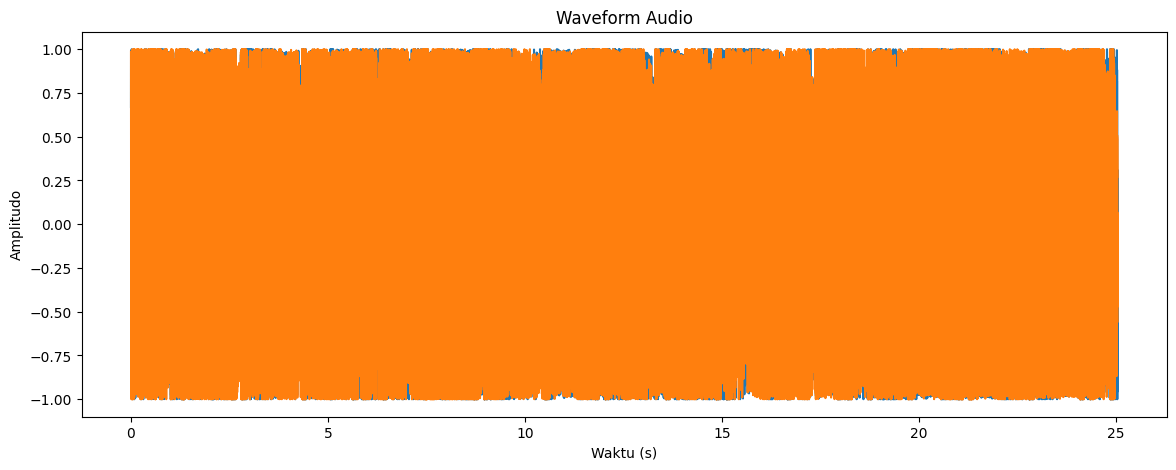

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Memuat file audio
audio_path = 'reff.wav'  # Ganti dengan path file audio yang kamu siapkan
data, samplerate = sf.read(audio_path)

# Menghitung waktu untuk setiap sampel audio
time = np.linspace(0, len(data) / samplerate, num=len(data))

# Menampilkan grafik waktu (waveform)
plt.figure(figsize=(14, 5))
plt.plot(time, data)
plt.title('Waveform Audio')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.show()


### FIR Rectangular Window

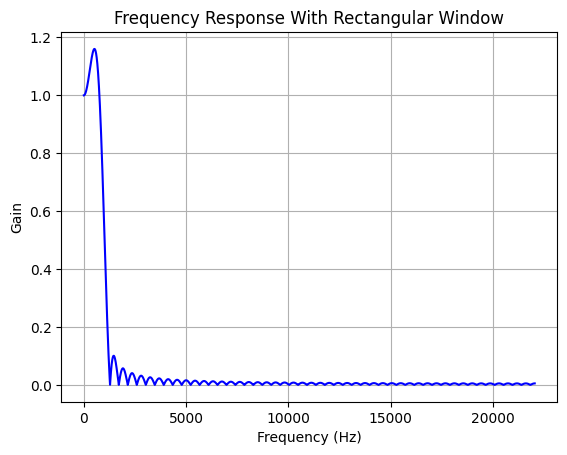

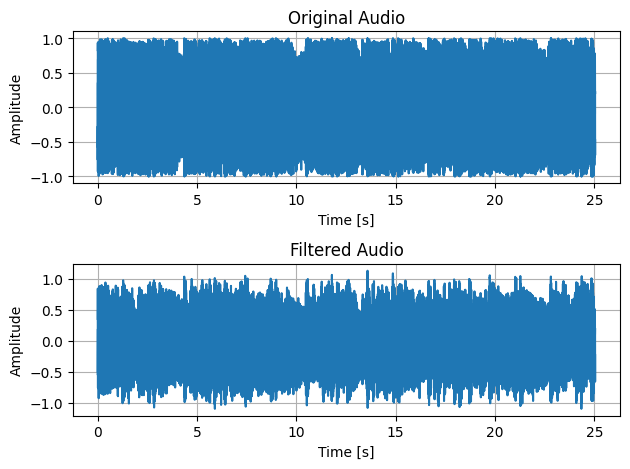

In [30]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Baca file audio
audio_file = 'reff.wav'  # ganti dengan nama file audio yang sesuai
audio_data, fs = sf.read(audio_file)

# Jika audio stereo, konversi menjadi mono dengan mengambil rata-rata dua kanal
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Tentukan spesifikasi filter
fc = 1000  # frekuensi cutoff dalam Hz
N = 101    # panjang filter (jumlah koefisien), harus ganjil

# Hitung impulse response ideal (Sinc function)
n = np.arange(N) - (N - 1) / 2
h = np.sinc(2 * fc * (n / fs))

# Terapkan jendela rectangular (dalam hal ini tidak mengubah koefisien)
window = np.ones(N)
h = h * window

# Normalisasi koefisien filter
h = h / np.sum(h)

# Terapkan filter ke sinyal audio
filtered_audio = np.convolve(audio_data, h, mode='same')

# Simpan hasil audio yang sudah difilter
filtered_audio_file = 'FIR_Rectangular.wav'
sf.write(filtered_audio_file, filtered_audio, fs)

# Visualisasi respons frekuensi dari filter
w, H = signal.freqz(h, worN=8000)
plt.figure()
plt.plot(0.5 * fs * w / np.pi, np.abs(H), 'b')
plt.title('Frequency Response With Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()

# Plot sinyal audio asli dan yang sudah difilter
time = np.arange(audio_data.shape[0]) / fs

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.title('Original Audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


### FIR Hamming Window

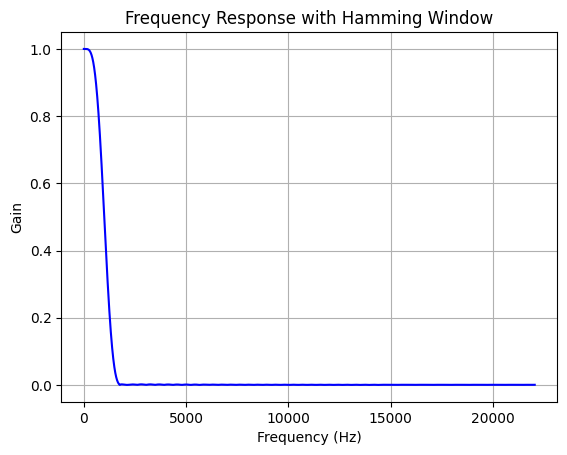

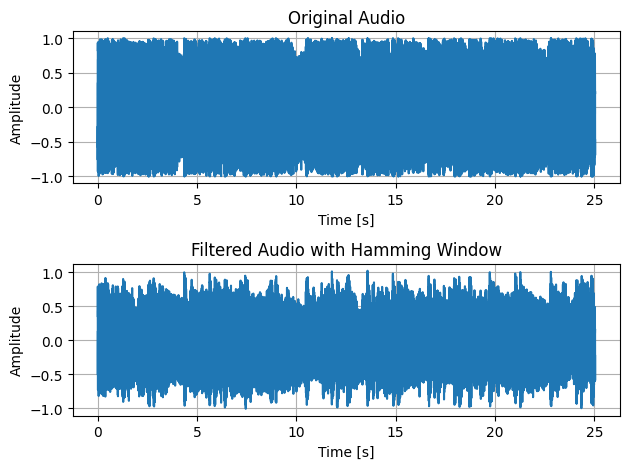

In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Baca file audio
audio_file = 'reff.wav'  # ganti dengan nama file audio yang sesuai
audio_data, fs = sf.read(audio_file)

# Jika audio stereo, konversi menjadi mono dengan mengambil rata-rata dua kanal
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Tentukan spesifikasi filter
fc = 1000  # frekuensi cutoff dalam Hz
N = 101    # panjang filter (jumlah koefisien), harus ganjil

# Hitung impulse response ideal (Sinc function)
n = np.arange(N) - (N - 1) / 2
h = np.sinc(2 * fc * (n / fs))

# Terapkan jendela Hamming
window = np.hamming(N)
h = h * window

# Normalisasi koefisien filter
h = h / np.sum(h)

# Terapkan filter ke sinyal audio
filtered_audio = np.convolve(audio_data, h, mode='same')

# Simpan hasil audio yang sudah difilter
filtered_audio_file = 'FIR_Hamming.wav'
sf.write(filtered_audio_file, filtered_audio, fs)

# Visualisasi respons frekuensi dari filter
w, H = signal.freqz(h, worN=8000)
plt.figure()
plt.plot(0.5 * fs * w / np.pi, np.abs(H), 'b')
plt.title('Frequency Response with Hamming Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()

# Plot sinyal audio asli dan yang sudah difilter di domain waktu
time = np.arange(audio_data.shape[0]) / fs

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.title('Original Audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio with Hamming Window')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


### FIR Blackman Window

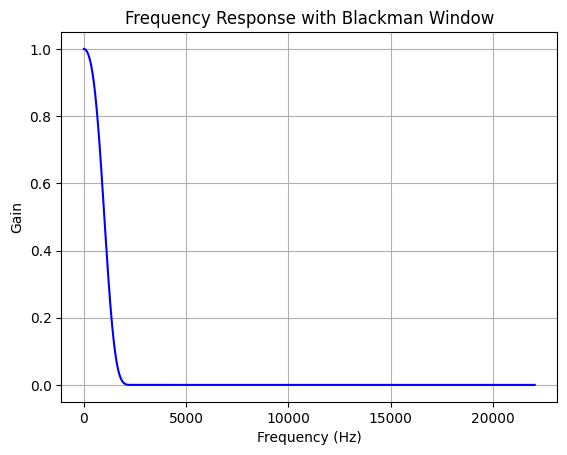

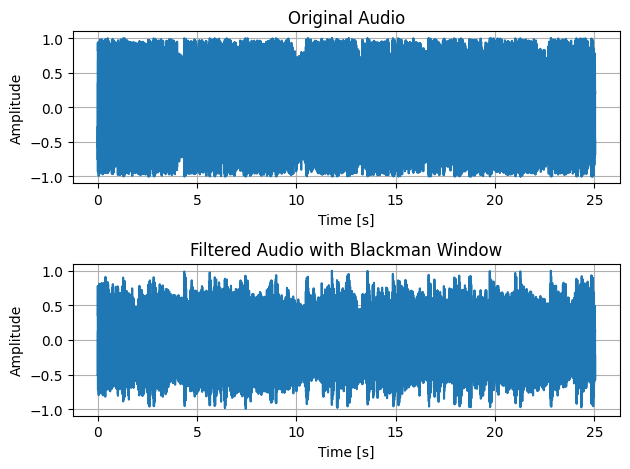

In [11]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Baca file audio
audio_file = 'reff.wav'  # ganti dengan nama file audio yang sesuai
audio_data, fs = sf.read(audio_file)

# Jika audio stereo, konversi menjadi mono dengan mengambil rata-rata dua kanal
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Tentukan spesifikasi filter
fc = 1000  # frekuensi cutoff dalam Hz
N = 101    # panjang filter (jumlah koefisien), harus ganjil

# Hitung impulse response ideal (Sinc function)
n = np.arange(N) - (N - 1) / 2
h = np.sinc(2 * fc * (n / fs))

# Terapkan jendela Blackman
window = np.blackman(N)
h = h * window

# Normalisasi koefisien filter
h = h / np.sum(h)

# Terapkan filter ke sinyal audio
filtered_audio = np.convolve(audio_data, h, mode='same')

# Simpan hasil audio yang sudah difilter
filtered_audio_file = 'FIR_Blackman.wav'
sf.write(filtered_audio_file, filtered_audio, fs)

# Visualisasi respons frekuensi dari filter
w, H = signal.freqz(h, worN=8000)
plt.plot(0.5 * fs * w / np.pi, np.abs(H), 'b')
plt.title('Frequency Response with Blackman Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()


## FIR Kaiser Window

<ipython-input-20-f08879a29989>:24: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.kaiser(N, beta)


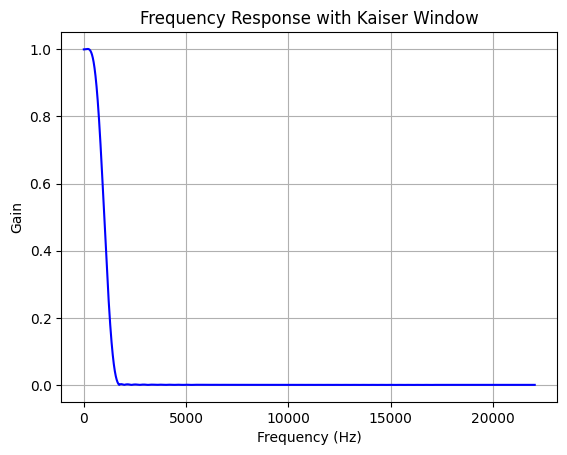

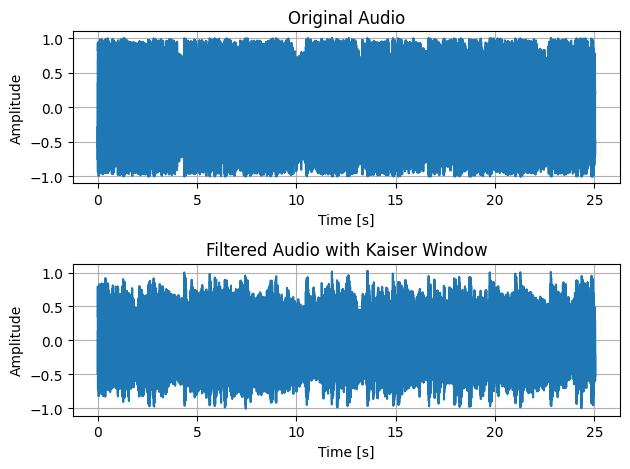

In [20]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Baca file audio
audio_file = 'reff.wav'  # ganti dengan nama file audio yang sesuai
audio_data, fs = sf.read(audio_file)

# Jika audio stereo, konversi menjadi mono dengan mengambil rata-rata dua kanal
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Tentukan spesifikasi filter
fc = 1000  # frekuensi cutoff dalam Hz
N = 101    # panjang filter (jumlah koefisien), harus ganjil

# Hitung impulse response ideal (Sinc function)
n = np.arange(N) - (N - 1) / 2
h = np.sinc(2 * fc * (n / fs))

# Terapkan jendela Kaiser
beta = 5  # faktor beta
window = signal.kaiser(N, beta)
h = h * window

# Normalisasi koefisien filter
h = h / np.sum(h)

# Terapkan filter ke sinyal audio
filtered_audio = np.convolve(audio_data, h, mode='same')

# Simpan hasil audio yang sudah difilter
filtered_audio_file = 'FIR_Kaiser.wav'
sf.write(filtered_audio_file, filtered_audio, fs)

# Visualisasi respons frekuensi dari filter
w, H = signal.freqz(h, worN=8000)
plt.plot(0.5 * fs * w / np.pi, np.abs(H), 'b')
plt.title('Frequency Response with Kaiser Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()

# Plot sinyal audio asli dan yang sudah difilter di domain waktu
time = np.arange(audio_data.shape[0]) / fs

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.title('Original Audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio with Kaiser Window')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


## IIR Hanning Window

<ipython-input-21-17805db0fe38>:22: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.hann(len(b))


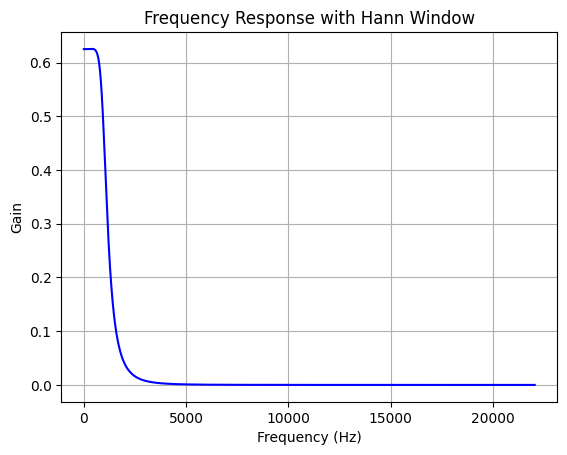

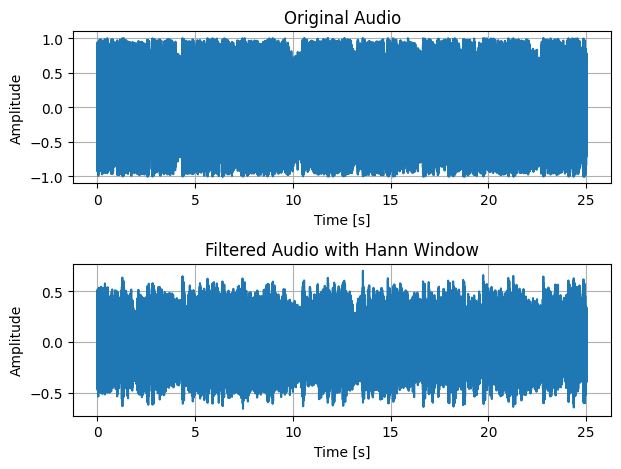

In [21]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Baca file audio
audio_file = 'reff.wav'  # ganti dengan nama file audio yang sesuai
audio_data, fs = sf.read(audio_file)

# Jika audio stereo, konversi menjadi mono dengan mengambil rata-rata dua kanal
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Spesifikasi filter
fc = 1000  # frekuensi cutoff dalam Hz
order = 4  # orde filter Butterworth

# Desain filter Butterworth
b, a = signal.butter(order, fc / (fs / 2), 'low')

# Terapkan jendela Hann
window = signal.hann(len(b))
b = b * window

# Hitung respons frekuensi
w, H = signal.freqz(b, a, worN=8000)

# Plot respons frekuensi
plt.figure()
plt.plot(0.5 * fs * w / np.pi, np.abs(H), 'b')
plt.title('Frequency Response with Hann Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()

# Terapkan filter ke sinyal audio
filtered_audio = signal.lfilter(b, a, audio_data)

# Simpan hasil audio yang sudah difilter
filtered_audio_file = 'IIR_Hanning.wav'
sf.write(filtered_audio_file, filtered_audio, fs)

# Plot sinyal audio asli dan yang sudah difilter di domain waktu
time = np.arange(audio_data.shape[0]) / fs

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.title('Original Audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio with Hann Window')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


## IIR Eliptic Window

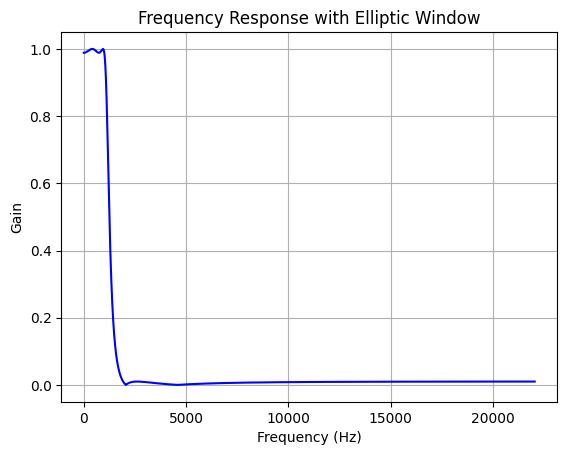

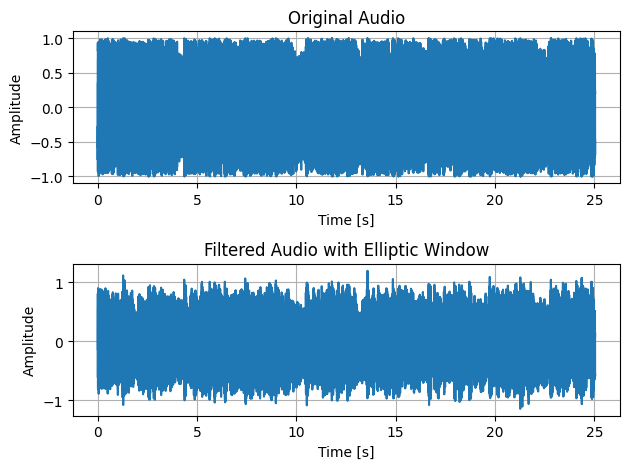

In [22]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Baca file audio
audio_file = 'reff.wav'  # ganti dengan nama file audio yang sesuai
audio_data, fs = sf.read(audio_file)

# Jika audio stereo, konversi menjadi mono dengan mengambil rata-rata dua kanal
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Spesifikasi filter
fc = 1000  # frekuensi cutoff dalam Hz
order = 4  # orde filter

# Desain filter elliptic
b, a = signal.ellip(order, 0.1, 40, fc / (fs / 2), 'low')

# Terapkan filter ke sinyal audio
filtered_audio = signal.lfilter(b, a, audio_data)

# Simpan hasil audio yang sudah difilter
filtered_audio_file = 'IIR_Elliptic.wav'
sf.write(filtered_audio_file, filtered_audio, fs)

# Hitung respons frekuensi
w, H = signal.freqz(b, a, worN=8000)

# Plot respons frekuensi
plt.figure()
plt.plot(0.5 * fs * w / np.pi, np.abs(H), 'b')
plt.title('Frequency Response with Elliptic Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()

# Plot sinyal audio asli dan yang sudah difilter di domain waktu
time = np.arange(audio_data.shape[0]) / fs

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.title('Original Audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio with Elliptic Window')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


## IIR Bessel Window

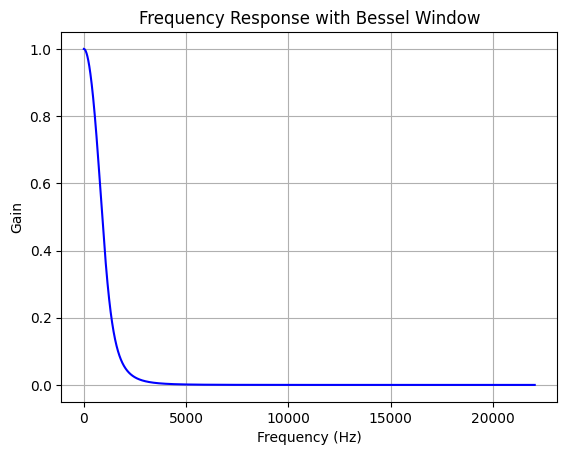

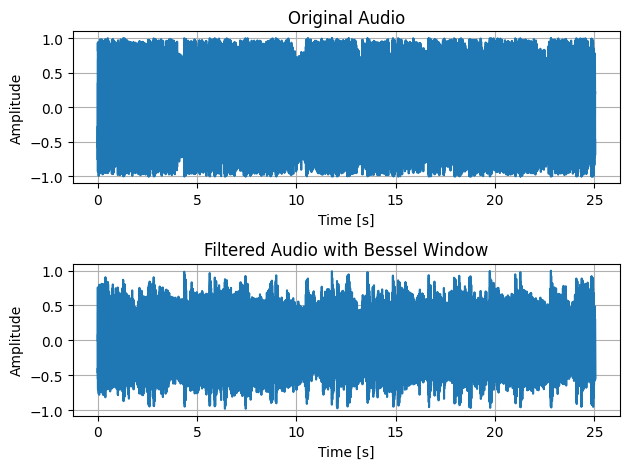

In [23]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Baca file audio
audio_file = 'reff.wav'  # ganti dengan nama file audio yang sesuai
audio_data, fs = sf.read(audio_file)

# Jika audio stereo, konversi menjadi mono dengan mengambil rata-rata dua kanal
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Spesifikasi filter
fc = 1000  # frekuensi cutoff dalam Hz
order = 4  # orde filter

# Desain filter Bessel
b, a = signal.bessel(order, fc / (fs / 2), 'low')

# Terapkan filter ke sinyal audio
filtered_audio = signal.lfilter(b, a, audio_data)

# Simpan hasil audio yang sudah difilter
filtered_audio_file = 'IIR_Bessel.wav'
sf.write(filtered_audio_file, filtered_audio, fs)

# Hitung respons frekuensi
w, H = signal.freqz(b, a, worN=8000)

# Plot respons frekuensi
plt.figure()
plt.plot(0.5 * fs * w / np.pi, np.abs(H), 'b')
plt.title('Frequency Response with Bessel Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()

# Plot sinyal audio asli dan yang sudah difilter di domain waktu
time = np.arange(audio_data.shape[0]) / fs

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.title('Original Audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio with Bessel Window')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


## IIR Butterworth Window

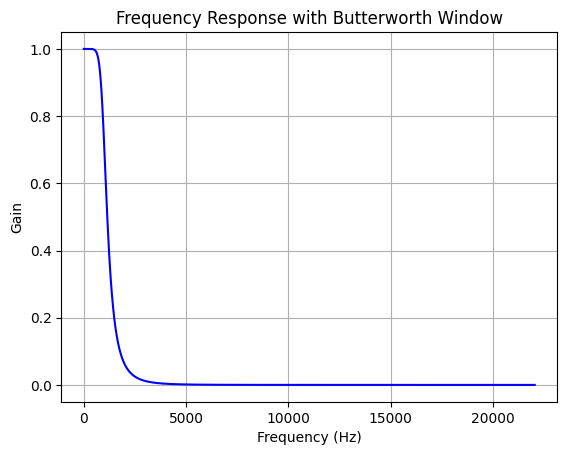

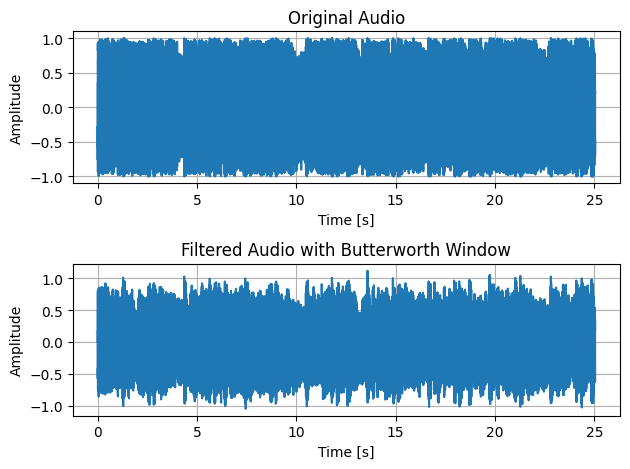

In [32]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Baca file audio
audio_file = 'reff.wav'  # ganti dengan nama file audio yang sesuai
audio_data, fs = sf.read(audio_file)

# Jika audio stereo, konversi menjadi mono dengan mengambil rata-rata dua kanal
if audio_data.ndim > 1:
    audio_data = np.mean(audio_data, axis=1)

# Spesifikasi filter
fc = 1000  # frekuensi cutoff dalam Hz
order = 4  # orde filter

# Desain filter Butterworth
b, a = signal.butter(order, fc / (fs / 2), 'low')

# Terapkan filter ke sinyal audio
filtered_audio = signal.lfilter(b, a, audio_data)

# Simpan hasil audio yang sudah difilter
filtered_audio_file = 'IIR_Butterworth.wav'
sf.write(filtered_audio_file, filtered_audio, fs)

# Hitung respons frekuensi
w, H = signal.freqz(b, a, worN=8000)

# Plot respons frekuensi
plt.figure()
plt.plot(0.5 * fs * w / np.pi, np.abs(H), 'b')
plt.title('Frequency Response with Butterworth Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()

# Plot sinyal audio asli dan yang sudah difilter di domain waktu
time = np.arange(audio_data.shape[0]) / fs

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.title('Original Audio')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, filtered_audio)
plt.title('Filtered Audio with Butterworth Window')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()
